In [3]:
import tensorflow as tf
import numpy as np
import matplotlib as mlt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import requests
from PIL import Image
import streamlit as st


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
tf.__version__

'2.10.1'

In [ ]:
np.__version__

'1.23.5'

In [ ]:
mlt.__version__

'3.9.3'

In [ ]:
pip install tensorflow numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


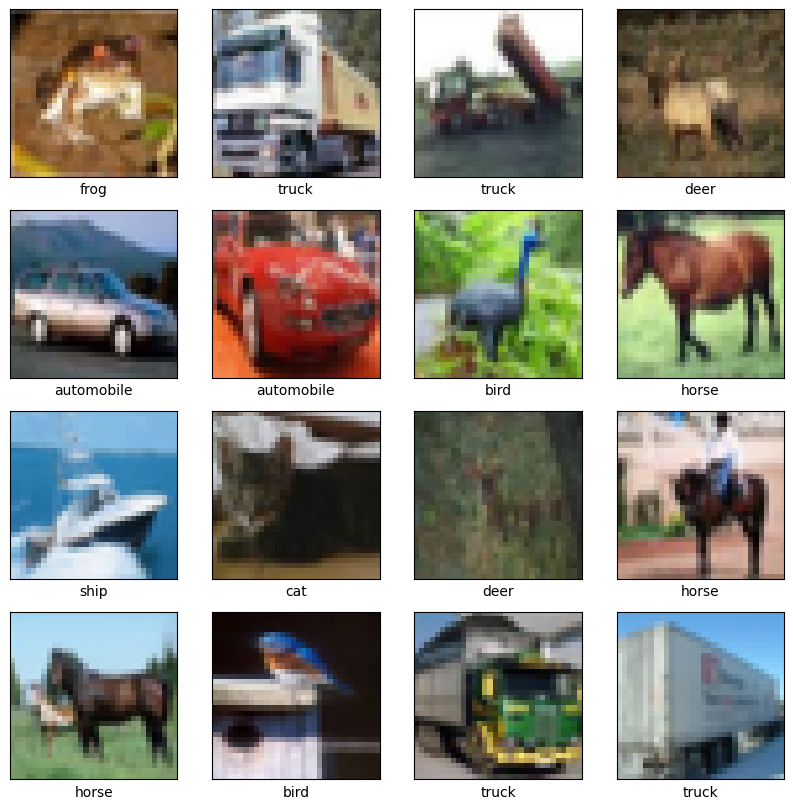

In [ ]:
# Visualize some images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [ ]:
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), batch_size=64)


Epoch 1/10
782/782 [==============================] - 29s 36ms/step - loss: 1.5683 - accuracy: 0.4318 - val_loss: 1.4275 - val_accuracy: 0.4910
Epoch 2/10
782/782 [==============================] - 30s 38ms/step - loss: 1.2013 - accuracy: 0.5753 - val_loss: 1.1656 - val_accuracy: 0.5826
Epoch 3/10
782/782 [==============================] - 29s 36ms/step - loss: 1.0528 - accuracy: 0.6309 - val_loss: 1.0189 - val_accuracy: 0.6440
Epoch 4/10
782/782 [==============================] - 28s 36ms/step - loss: 0.9527 - accuracy: 0.6676 - val_loss: 0.9275 - val_accuracy: 0.6765
Epoch 5/10
782/782 [==============================] - 29s 37ms/step - loss: 0.8764 - accuracy: 0.6927 - val_loss: 0.9640 - val_accuracy: 0.6660
Epoch 6/10
782/782 [==============================] - 28s 36ms/step - loss: 0.8189 - accuracy: 0.7129 - val_loss: 0.8729 - val_accuracy: 0.7007
Epoch 7/10
782/782 [==============================] - 29s 37ms/step - loss: 0.7668 - accuracy: 0.7324 - val_loss: 0.9104 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 3s - loss: 0.8385 - accuracy: 0.7196 - 3s/epoch - 9ms/step
Test accuracy: 0.7196000218391418


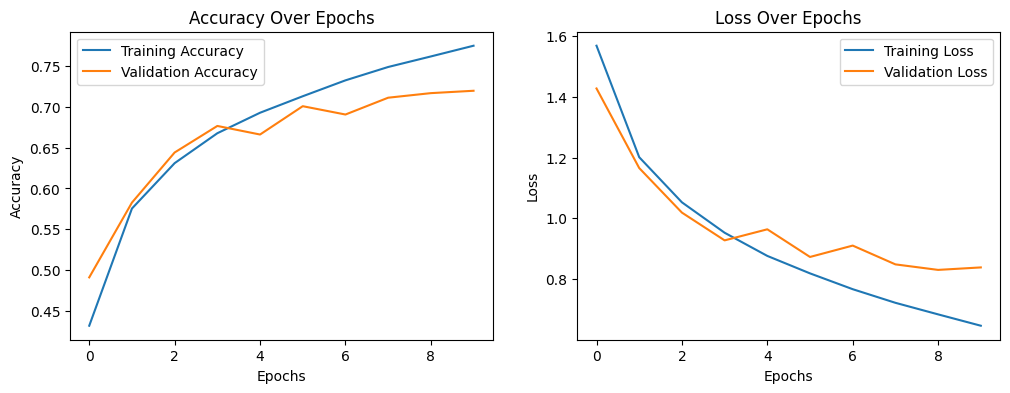

In [ ]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


313/313 [==============================] - 3s 9ms/step


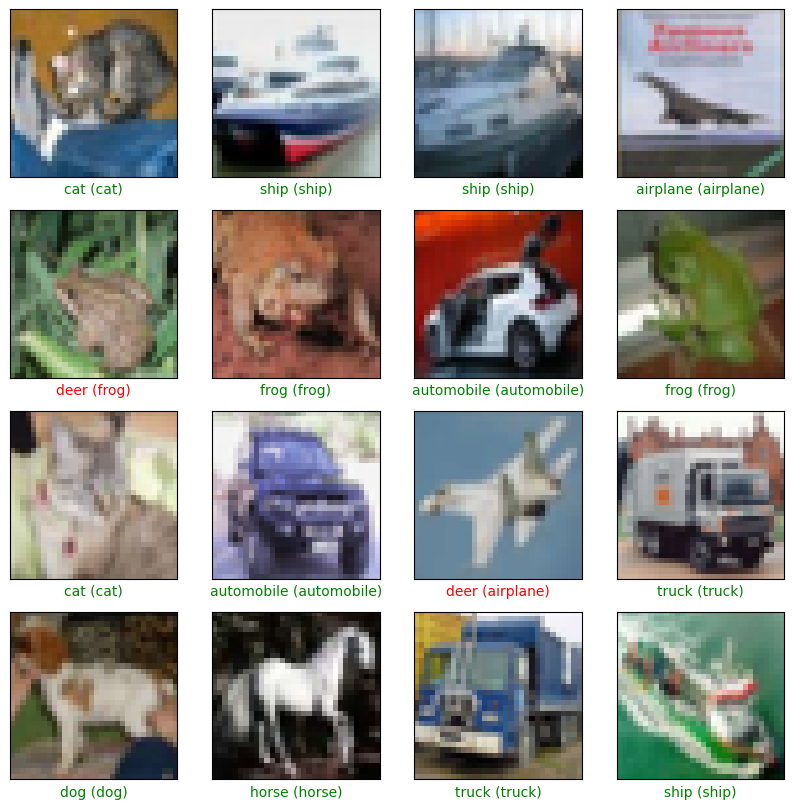

In [ ]:
# Predict on test images
predictions = model.predict(x_test)

# Display predictions for some test images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i][0]]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()


In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy
print(f"Test accuracy: {test_acc:.2f}")


313/313 - 3s - loss: 0.8385 - accuracy: 0.7196 - 3s/epoch - 10ms/step
Test accuracy: 0.72


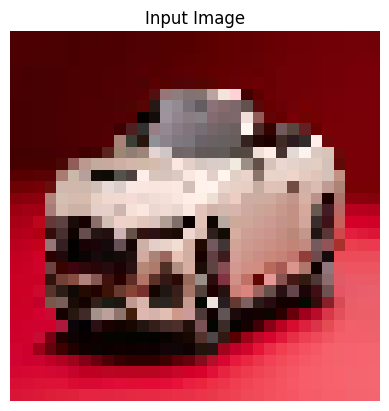

In [ ]:
img_path =  "mustang.jpeg"
img = load_img(img_path, target_size=(32, 32))  

img_array = img_to_array(img) / 255.0


img_array = np.expand_dims(img_array, axis=0)


plt.imshow(img)
plt.title("Input Image")
plt.axis('off')
plt.show()


In [ ]:
# Predict the class probabilities for the image
prediction = model.predict(img_array)

# Get the predicted class index (highest probability)
predicted_class_index = np.argmax(prediction)

# Get the predicted class label from class names
predicted_class_label = class_names[predicted_class_index]

# Get the confidence (probability) for the predicted class
predicted_confidence = prediction[0][predicted_class_index]

# Display the results
print(f"Predicted class: {predicted_class_label}")
print(f"Prediction confidence: {predicted_confidence * 100:.2f}%")


1/1 [==============================] - 0s 42ms/step
Predicted class: automobile
Prediction confidence: 84.52%
